In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Create a Dataframe with Dependent Variable(x) and independent variable y. 
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

In [12]:
#Create Linear Regression Model using Polyfit Function:
model = np.polyfit(x, y, 1)
model
# first coefficient represents the slope of the line, and the second coefficient represents the intercept. 

array([ 0.64383562, 26.78082192])

In [14]:
#Predict the Y value for X and observe the output.
predict = np.poly1d(model)
predict(65)

68.63013698630137

In [17]:
#Predict the y_pred for all values of x.
y_pred = predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [18]:
#Evaluate the performance of Model (R-Suare) 

from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889326

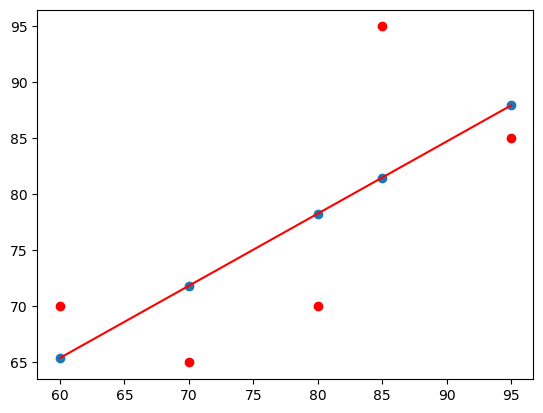

In [19]:
# Plotting the linear regression model 

y_line = model[1] + model[0] * x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')

In [28]:
!pip install scikit-learn==1.1.3

Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Step 1: Import libraries and create alias for Pandas, Numpy, and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# Step 2: Import the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\tusha\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [24]:
# Step 3: Initialize the data frame
data = pd.DataFrame(boston.data)

In [25]:
# Step 4: Add the feature names to the dataframe
data.columns = boston.feature_names

In [26]:
# Step 5: Adding target variable to dataframe
data['PRICE'] = boston.target

In [27]:
# Step 6: Perform Data Preprocessing( Check for missing values)
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [30]:
# Step 7: Split dependent variable and independent variables
x = data.drop(['PRICE'], axis=1)
y = data['PRICE']

In [31]:
# Step 8: splitting data to training and testing dataset.
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
# Step 9: Use linear regression( Train the Machine ) to Create Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain, ytrain)


In [33]:
# Step 10: Predict the y_pred for all values of train_x and test_x
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)


In [34]:
# Step 11: Evaluate the performance of Model for train_y and test_y
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Train): 19.326470203585725
Mean Squared Error (Test): 33.44897999767639


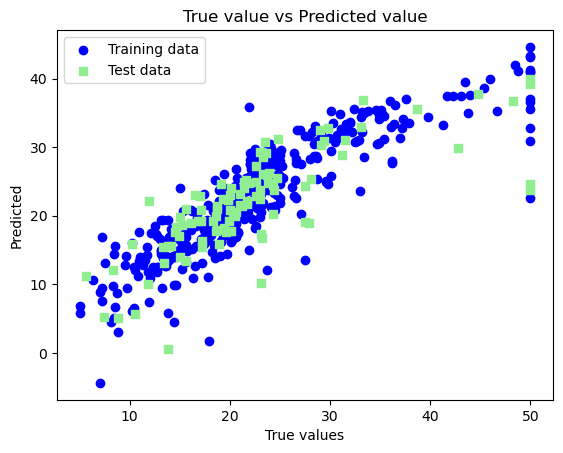

In [35]:
# Step 12: Plotting the linear regression model
plt.scatter(ytrain, ytrain_pred, c='blue', marker='o', label='Training data')
plt.scatter(ytest, ytest_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')
plt.plot()
plt.show()